<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/3_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import required libraries

In [1]:
import tensorflow as tf

# Import TensorFlow Datasets
import tensorflow_datasets as tfds

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

## Import the Fashion MNIST dataset

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteY5ANL8/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteY5ANL8/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


## Define classes

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

## Explore the data

In [4]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


## Preprocess the dataset

In [5]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

## Build the Modal

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the Modal

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the Modal

In [8]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [31]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 9s 2ms/step - loss: 0.3946 - accuracy: 0.8590
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2587 - accuracy: 0.9051
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2105 - accuracy: 0.9232
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1825 - accuracy: 0.9326
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1567 - accuracy: 0.9423
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1310 - accuracy: 0.9523
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9612
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907 - accuracy: 0.9665
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9727
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.062

## Evaluate accuracy

In [32]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.9162
Accuracy on test dataset: 0.9161999821662903


## Make Predictions

In [33]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [34]:
predictions.shape

(32, 10)

In [41]:
prediction_index = 2
predictions[prediction_index]
prediction_value = np.argmax(predictions[prediction_index])
print('prediction_value - ', prediction_value)

prediction_value -  9


In [42]:
label = test_labels[prediction_index]
class_name = class_names[label]
print('Actual value : ', label)
print('class_name : ', class_name)

Actual value :  9
class_name :  Ankle boot


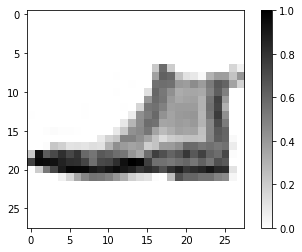

In [43]:
img = test_images[prediction_index]
plt.figure()
plt.imshow(img[...,0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()